Project Task: Week 1
Data Exploration:

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dataset = pd.read_csv('diabetes.csv')

# Perform descriptive analysis

In [3]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset dimensions - (rows, columns)
dataset.shape

(768, 9)

In [5]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#1.There are a total of 768 records and 9 features in the dataset.
#2.Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
#3.There are zero NaN values in the dataset.
#4.In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

## On the columns below, a value of zero does not make sense and thus indicates missing value

In [7]:
dataset_new = dataset

In [8]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", 
                                         "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [9]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Visually explore these variables using histograms

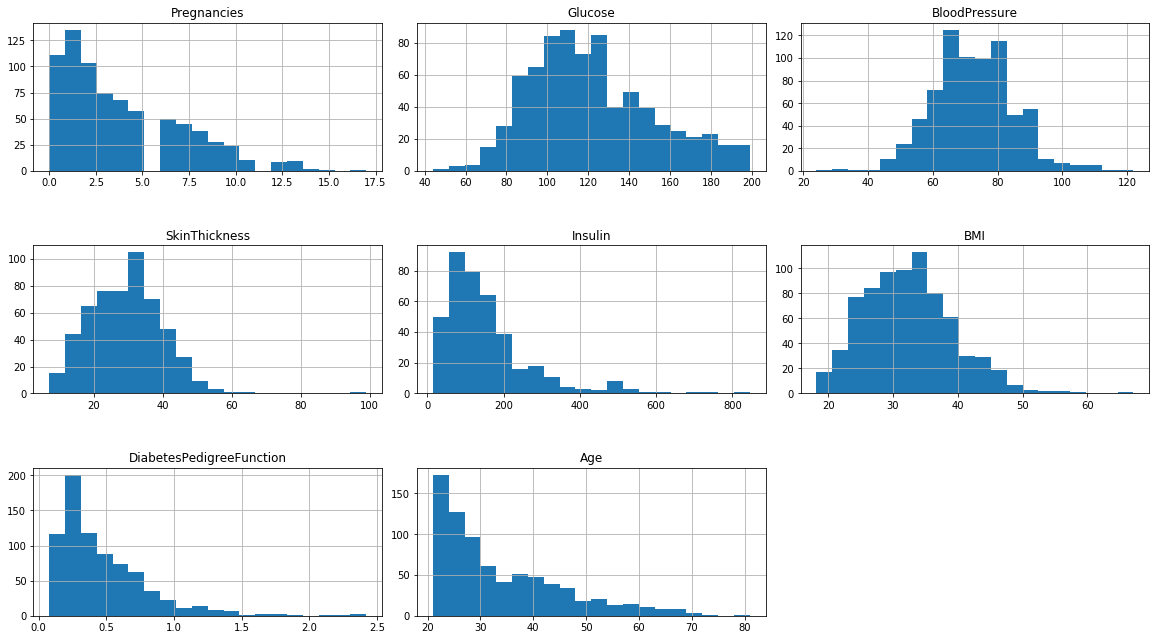

In [11]:
# Histogram of each feature including NAN values:
import itertools

col = dataset_new.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

## Treat the missing values accordingly

In [12]:
# Replacing NaN with mean values:
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [13]:
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


## Visually explore these variables using histograms

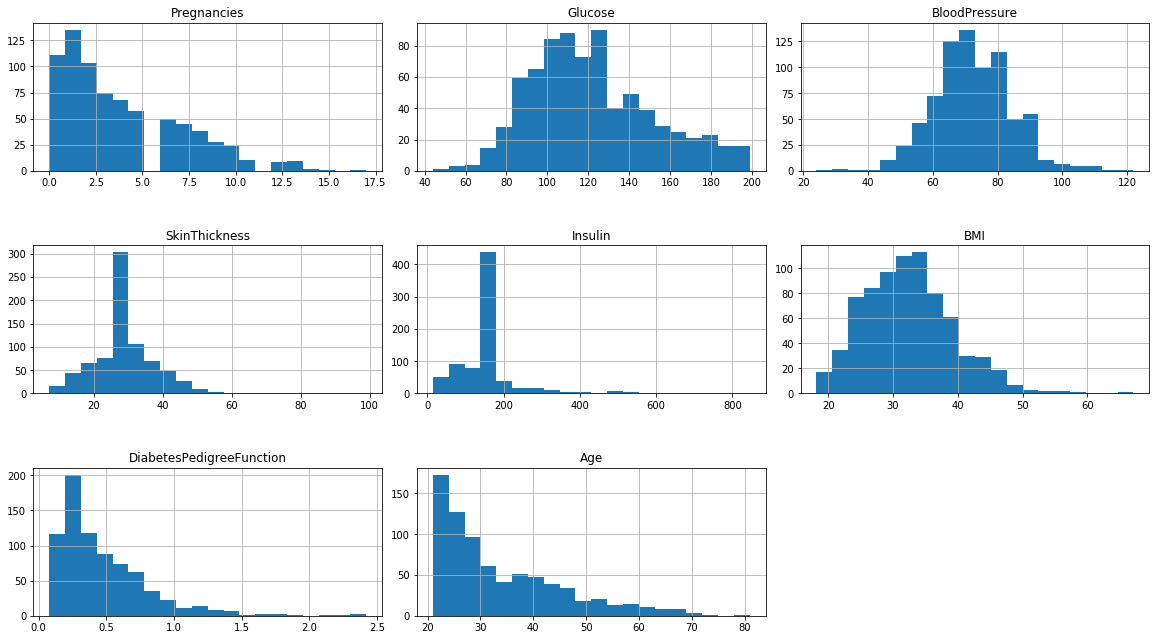

In [14]:
# Histogram of each feature:
import itertools

col = dataset_new.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

## There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [15]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Project Task: Week 2
Data Exploration:

## Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

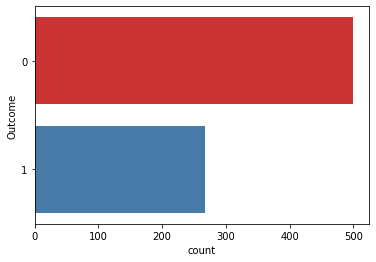

In [16]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=dataset_new['Outcome'],palette='Set1')

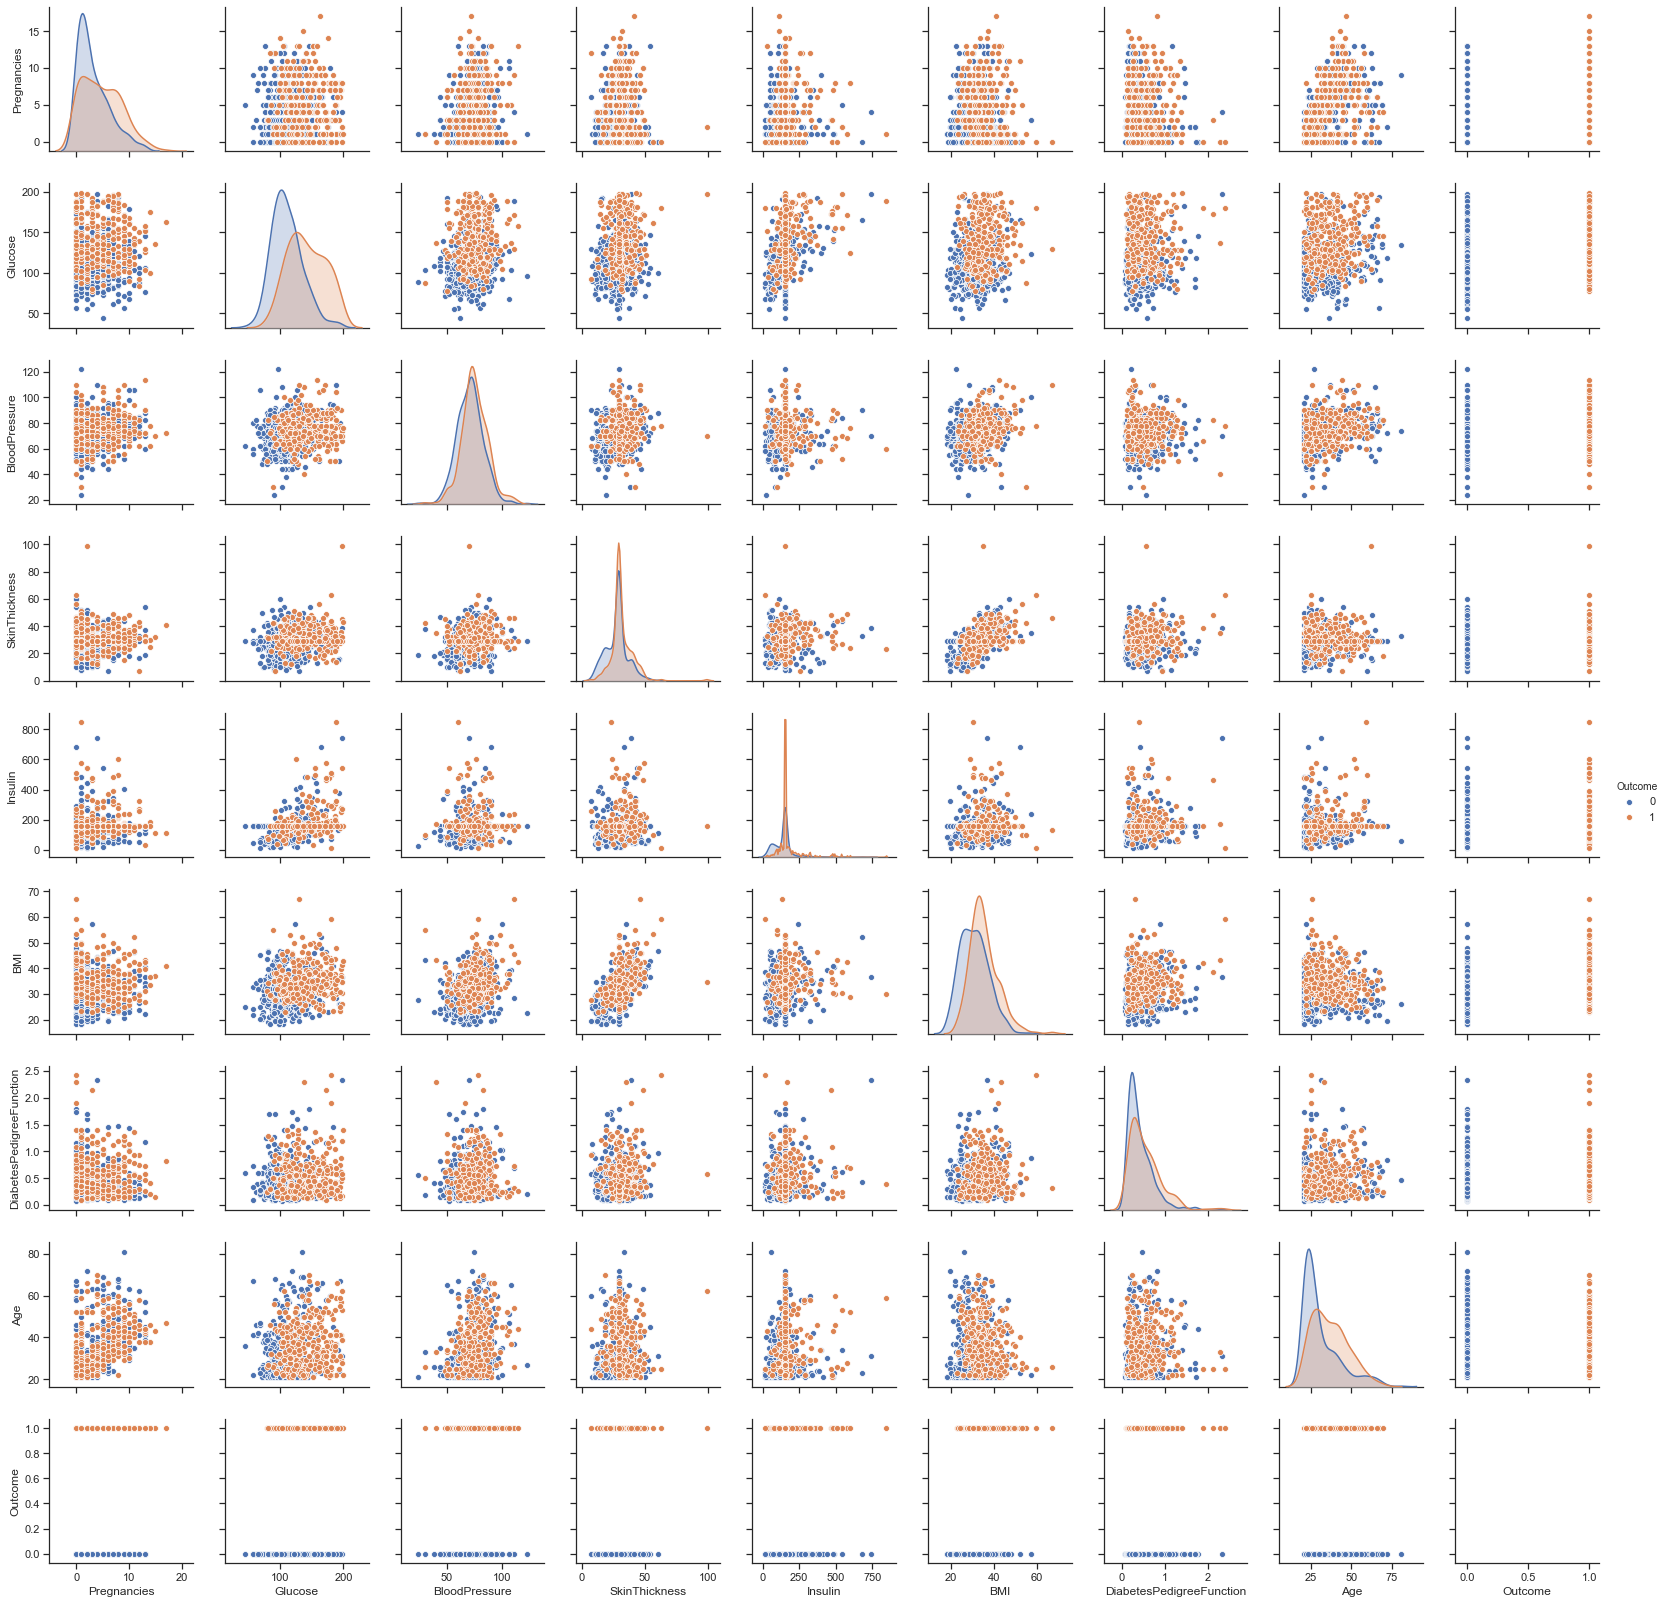

In [17]:
sns.set(style="ticks")
sns.pairplot(dataset_new, hue="Outcome")

(9.0, 0.0)

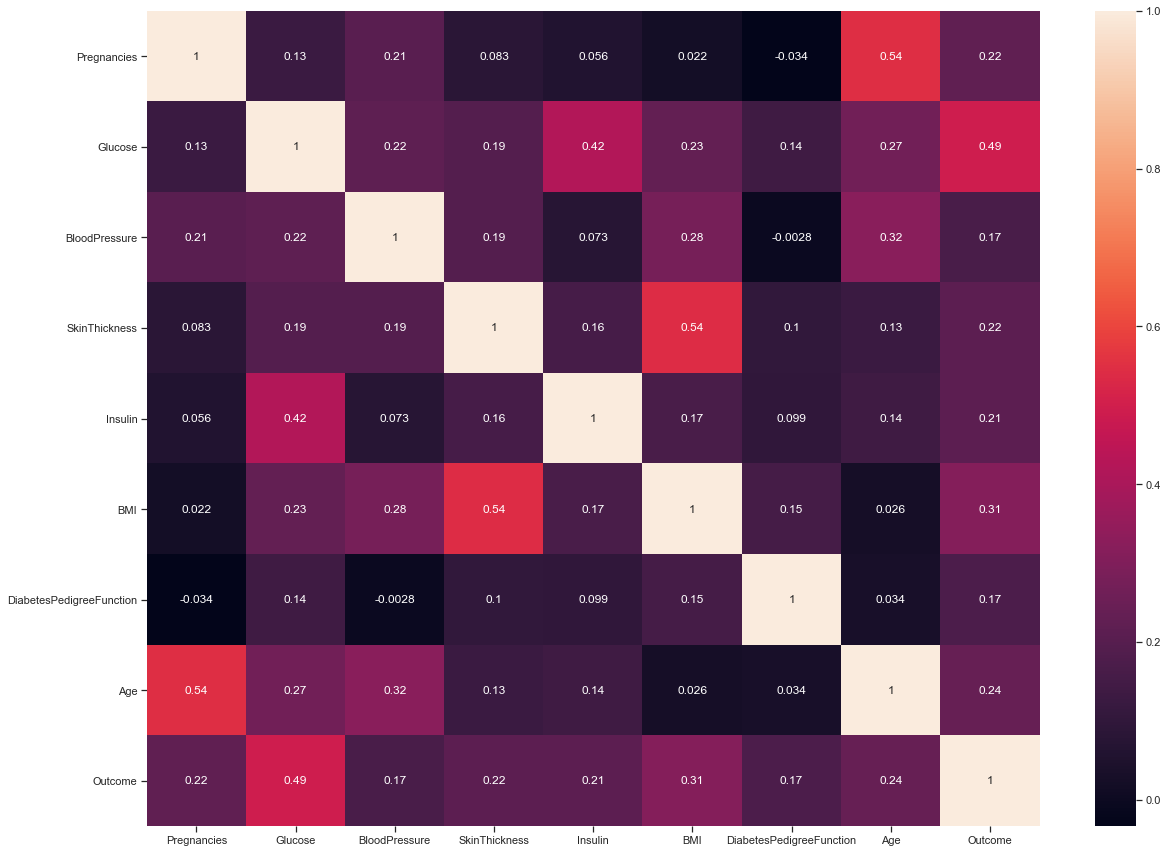

In [18]:
# Heatmap

plt.subplots(figsize=(20,15))
ax = sns.heatmap(dataset_new.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

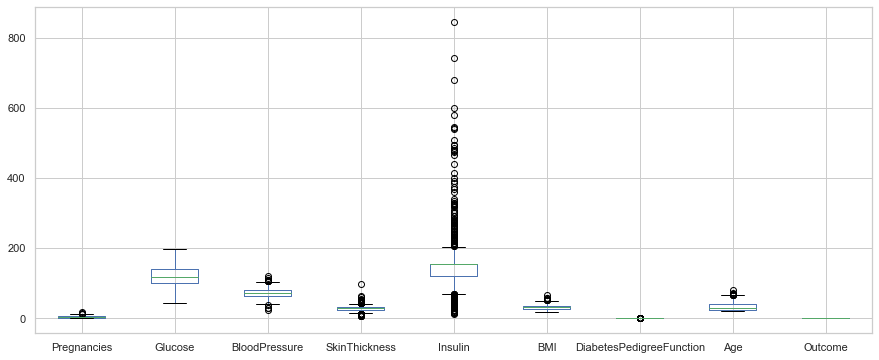

In [19]:
#box plot for outlier visualization
sns.set(style="whitegrid")
dataset_new.boxplot(figsize=(15,6))

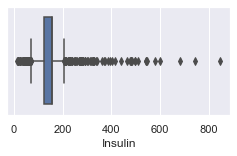

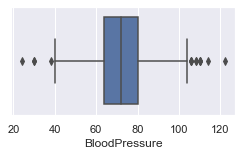

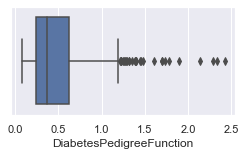

In [20]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=dataset_new['Insulin'])
plt.show()
sns.boxplot(x=dataset_new['BloodPressure'])
plt.show()
sns.boxplot(x=dataset_new['DiabetesPedigreeFunction'])
plt.show()

1.The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who have.
2.From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.
3.From box plot we can see the outlier. Hence now we have to remove those outlier

In [21]:
#outlier remove

Q1 = dataset_new.quantile(0.25)
Q3 = dataset_new.quantile(0.75)

IQR = Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)


---Q1--- 
 Pregnancies                   1.00000
Glucose                      99.75000
BloodPressure                64.00000
SkinThickness                25.00000
Insulin                     121.50000
BMI                          27.50000
DiabetesPedigreeFunction      0.24375
Age                          24.00000
Outcome                       0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000000
Glucose                     140.250000
BloodPressure                80.000000
SkinThickness                32.000000
Insulin                     155.548223
BMI                          36.600000
DiabetesPedigreeFunction      0.626250
Age                          41.000000
Outcome                       1.000000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness                7.000000
Insulin                     34.048223
BMI                         

In [22]:
#Deleting Outlier:

dataset_out = dataset_new[~((dataset_new< (Q1 - 1.5 * IQR)) |(dataset_new > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_new.shape,dataset_out.shape

((768, 9), (515, 9))

more than 80 records deleted

## Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

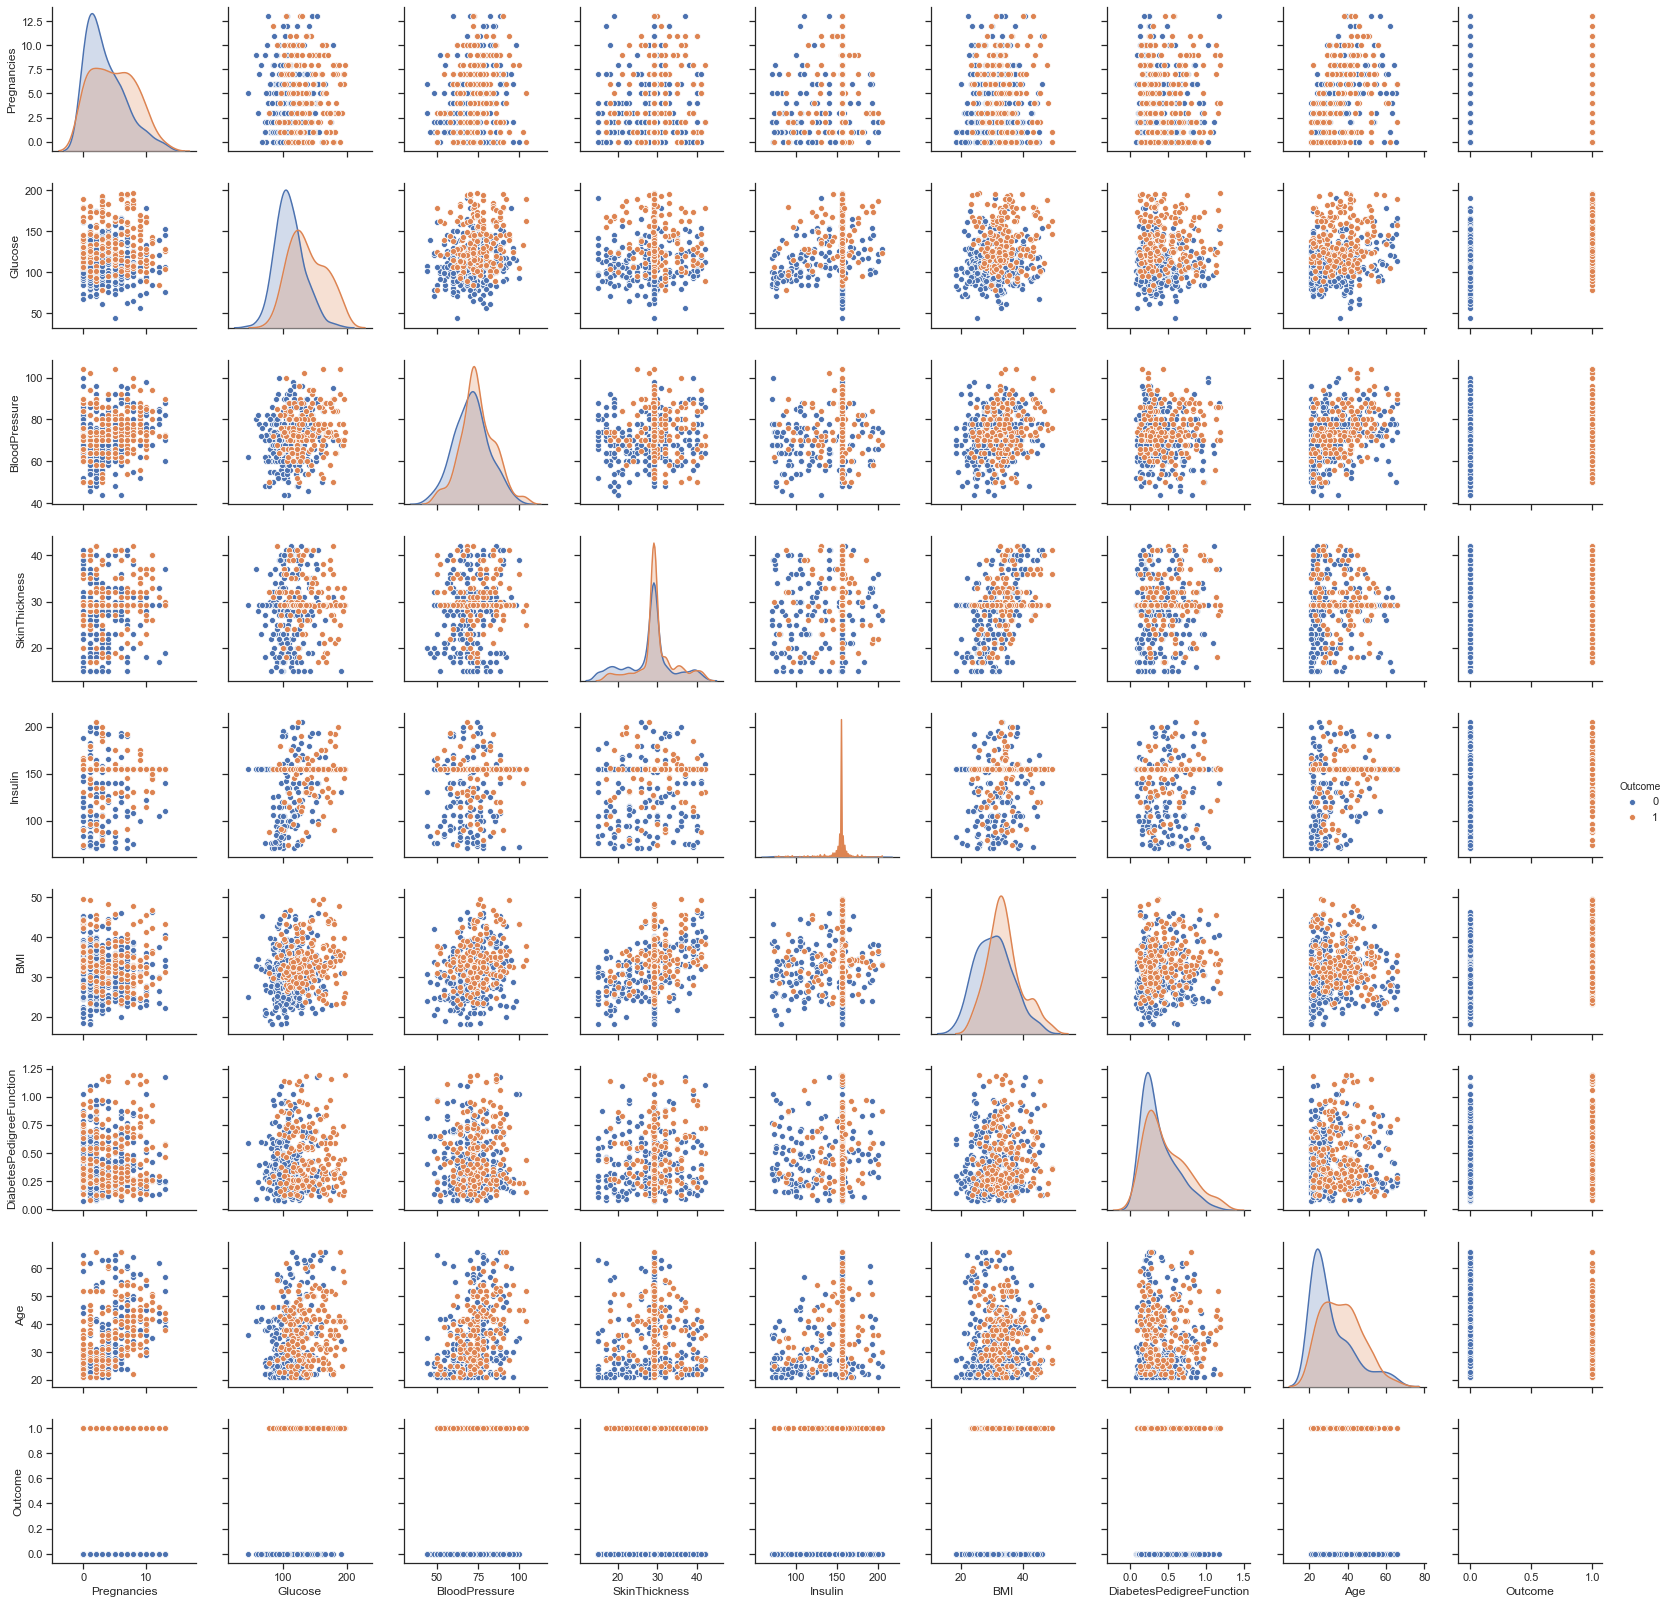

In [23]:
#Scatter charts between the pair of variables to understand the relationships:

sns.set(style="ticks")
sns.pairplot(dataset_out, hue="Outcome")
plt.show()

From above the scatter plot we can see that the distribution of independent variables over dependent variable i.e outcome

## Perform correlation analysis. Visually explore it using a heat map.

In [24]:
#Perform correlation analysis:

corr = dataset_out.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.110622       0.201698       0.129082   
Glucose                      0.110622  1.000000       0.214924       0.069066   
BloodPressure                0.201698  0.214924       1.000000       0.128661   
SkinThickness                0.129082  0.069066       0.128661       1.000000   
Insulin                      0.119618  0.180899       0.107820       0.125630   
BMI                          0.028829  0.152330       0.229477       0.415246   
DiabetesPedigreeFunction     0.014969  0.068436       0.025405       0.051262   
Age                          0.513640  0.266073       0.352452       0.074935   
Outcome                      0.187868  0.478218       0.162221       0.151155   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.119618  0.028829                  0.014969   
Glucose                   0.180899  0.152

(9.0, 0.0)

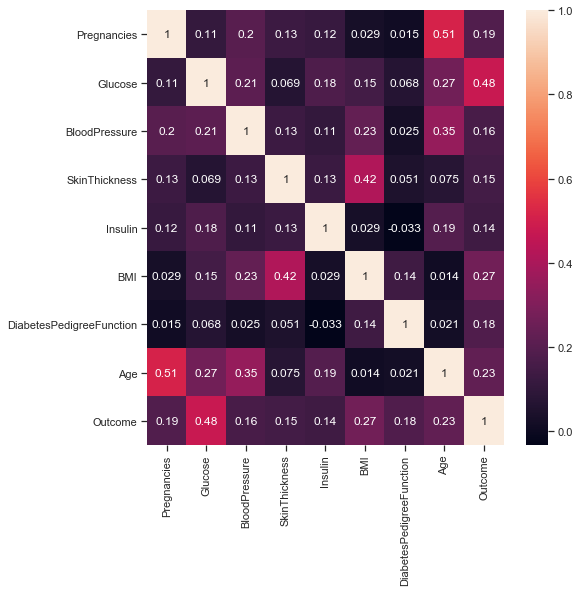

In [25]:
#Visually explore it using a heat map.

plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Project Task: Week 3
Data Modeling:

## Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

In [26]:
#Feature Engineering:

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = dataset_out[feature_names]
y = dataset_out.Outcome

In [27]:
#Model Selection:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

#Evaluation Methods:

It is a general practice to avoid training and testing on the same data. 
The reasons are that the goal of the model is to predict out-of-sample data, 
and the model could be overly complex leading to overfitting. 
To avoid the aforementioned problems, there are two precautions.

1.Train/Test Split
2.K-Fold Cross-Validation

We will import “train_test_split” for train/test split and “cross_val_score” for k-fold cross-validation. 
“accuracy_score” is to evaluate the accuracy of the model in the train/test split method.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [29]:
#Train/Test Split with Scikit Learn :

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = dataset_out.Outcome, random_state=0)

Then we fit each model in a loop and calculate the accuracy of the respective model using the “accuracy_score”.

In [30]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.759690
1  SVC  0.651163
2   LR  0.782946
3   DT  0.744186
4  GNB  0.751938
5   RF  0.775194
6   GB  0.775194


#K-Fold Cross-Validation:

This method splits the data set into K equal partitions (“folds”), 
then use 1 fold as the testing set and the union of the other folds as the training set. 
Then the model is tested for accuracy. The process will follow the above steps K times, 
using different folds as the testing set each time. The average testing accuracy of the process is the testing accuracy.

K-Fold Cross Validation with Scikit Learn :

We will move forward with K-Fold cross validation as it is more accurate and use the data efficiently. 
We will train the models using 10 fold cross validation and calculate the mean accuracy of the models. 
“cross_val_score” provides its own training and accuracy calculation interface.

In [31]:
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.707164
1  SVC  0.652790
2   LR  0.745965
3   DT  0.660219
4  GNB  0.728431
5   RF  0.724585
6   GB  0.718703


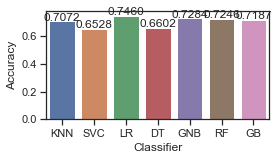

In [32]:
#We can plot the accuracy scores using seaborn:

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#Conclusion:

           We can see the Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boosting have performed better than the rest.
From the base level we can observe that the Logistic Regression performs better than the other algorithms.

           At the baseline Random Forest managed to achieve a classification accuracy of 75.95 %. 
This will be selected as the prime candidate for the next phases.

## Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [33]:
#lets extract features and targets

X=dataset_out.drop(columns=['Outcome'])
y=dataset_out['Outcome']

In [34]:
#Splitting train test data 80 20 ratio

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [35]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((412, 8), (103, 8), (412,), (103,))

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

#Lets build the model:

In [37]:
#Logistic Regression:
#import library:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7281553398058253 ROC 0.6762605042016806
TP:  [ 9  6  6  5  5 11  4  4  9 10]
TN:  [24 26 24 25 25 26 24 24 18 22]
FN:  [ 6  9  9 10  9  3 10 10  5  4]
FP:  [3 1 3 2 2 1 3 3 8 4]


,Actual,Predicted
294,0,1
365,0,0
33,0,0
630,1,0
675,1,1


In [38]:
#Support Vector Machine:
#import library:
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7572815533980582 ROC 0.7052521008403361
TP:  [ 9  8  7  6  6 11  5  4  8 10]
TN:  [24 25 25 26 25 25 24 23 18 21]
FN:  [ 6  7  8  9  8  3  9 10  6  4]
FP:  [3 2 2 1 2 2 3 4 8 5]


,Actual,Predicted
294,0,0
365,0,0
33,0,0
630,1,0
675,1,1


In [39]:
#KNN
#import library:

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7378640776699029 ROC 0.6905462184873948
TP:  [ 9 10  7  9  7  9  4  9 10 11]
TN:  [19 25 25 22 23 18 23 20 15 17]
FN:  [ 6  5  8  6  7  5 10  5  4  3]
FP:  [ 8  2  2  5  4  9  4  7 11  9]


,Actual,Predicted
294,0,0
365,0,0
33,0,0
630,1,0
675,1,1


In [40]:
#Random forest:
#import library:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7766990291262136 ROC 0.726890756302521
TP:  [ 7  8  7  7  7  6  7  4  7 10]
TN:  [22 26 25 22 24 21 23 23 19 20]
FN:  [ 8  7  8  8  7  8  7 10  7  4]
FP:  [5 1 2 5 3 6 4 4 7 6]


,Actual,Predicted
294,0,0
365,0,0
33,0,0
630,1,0
675,1,1


In [41]:
#Naive Bayes Theorem:
#import library:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7475728155339806 ROC 0.7186974789915966
TP:  [ 7  9  9 10  8  9  8  7  9 12]
TN:  [21 25 25 24 26 21 22 22 13 22]
FN:  [8 6 6 5 6 5 6 7 5 2]
FP:  [ 6  2  2  3  1  6  5  5 13  4]


,Actual,Predicted
294,0,0
365,0,0
33,0,0
630,1,0
675,1,1


In [42]:
#Gradient Boosting Classifier:
#import library:

from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7378640776699029 ROC 0.6836134453781512
TP:  [ 7  9  9  8  9  8  9  8 11 12]
TN:  [21 24 26 20 25 21 23 21 19 21]
FN:  [8 6 6 7 5 6 5 6 3 2]
FP:  [6 3 1 7 2 6 4 6 7 5]


,Actual,Predicted
294,0,0
365,0,0
33,0,0
630,1,0
675,1,1


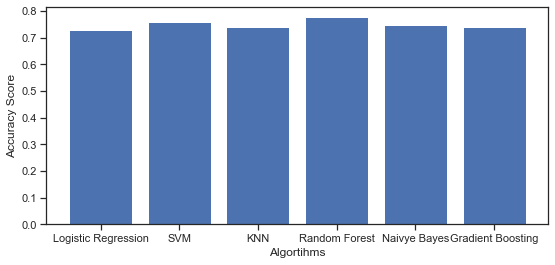

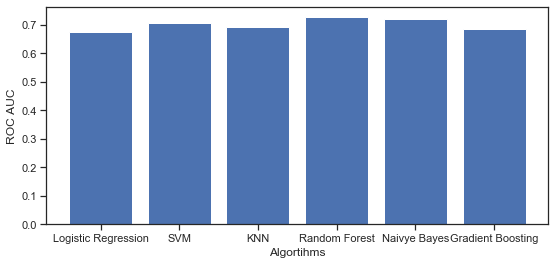

In [43]:
#lets plot the bar graph

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

#Random forest has highest accuracy 75% and ROC_AUC curve 64%
#model can be improve more if we take same count of labels
#in our model 30% is diabetic and 70% no diabetic patient
#model can be improve with fine tunning

## Compare various models with the results from KNN algorithm.

LR: 0.745965 (0.082342)
LDA: 0.755656 (0.072955)
KNN: 0.707164 (0.076619)
CART: 0.658296 (0.061508)
RF: 0.732466 (0.090377)
NB: 0.728431 (0.083195)
SVM: 0.652790 (0.078126)


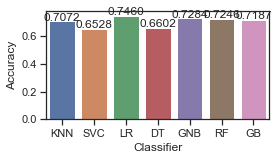

In [44]:
# Compare Algorithms:

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Feature Engineering:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = dataset_out[feature_names]
Y = dataset_out.Outcome

#Prepare configuration for cross validation test harness:
seed = 7

#Prepare models:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Evaluate each model in turn:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

#Boxplot algorithm comparison:
axis= sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.show()

Project Task: Week 4
Data Modeling:

## Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [45]:
#Data Stratification:
from sklearn.model_selection import train_test_split 

#Divide into training and testing data:
train,test = train_test_split(dataset_out, test_size=0.25, random_state=0, stratify=dataset_out['Outcome']) 

#Separate the 'Outcome' column from training/testing data:
train_X = train[train.columns[:8]]
test_X = test[test.columns[:8]]
train_Y = train['Outcome']
test_Y = test['Outcome']

In [46]:
#Statistical Model:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)

In [47]:
#Calculate accuracy:
from sklearn import metrics

print(metrics.accuracy_score(test_Y, prediction))

0.7364341085271318


##Null accuracy

In [48]:
the_most_outcome = dataset_out['Outcome'].median()
prediction2 = [the_most_outcome for i in range(len(test_Y))]
print(metrics.accuracy_score(test_Y, prediction2))

0.6511627906976745


##Confusion Matrix

In [49]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_Y, prediction)
confusion_matrix

array([[73, 11],
       [23, 22]], dtype=int64)

<Figure size 288x144 with 0 Axes>

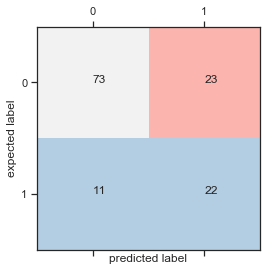

In [50]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [51]:
# [row, column]
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.4889
Specificity  : 0.8690


##Classification Threshold

In [52]:
#Print the first 10 predicted responses:

#1D array (vector) of binary values (0, 1)

model.predict(test_X)[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [53]:
#Print the first 10 predicted probabilities of class membership:

model.predict_proba(test_X)[0:10]

array([[0.5, 0.5],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.4, 0.6],
       [1. , 0. ],
       [0.7, 0.3],
       [1. , 0. ],
       [0.3, 0.7]])

1.In each row the numbers sum up to 1

2.There are 2 columns for 2 classes ('Outcome' = 0 and 'Outcome' = 1)
      column 0: predicted probability that each observation is a member of class 0
      column 1: predicted probability that each observation is a member of class 1

3.Choose the class with the highest probability (classification threshold = 0.5)
      Class 1 is predicted if probability > 0.5
      Class 0 is predicted if probability < 0.5

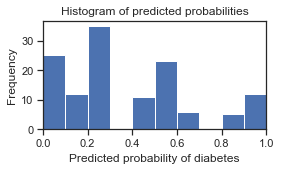

In [54]:
#Histogram of predicted probabilities:

save_predictions_proba = model.predict_proba(test_X)[:, 1]  # column 1

plt.hist(save_predictions_proba, bins=10)
plt.xlim(0,1) # x-axis limit from 0 to 1
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

In [55]:
#Predict diabetes if the predicted probability is greater than 0.3:
from sklearn.preprocessing import binarize

#It will return 1 for all values above 0.3 and 0 otherwise:

#Results are 2D so we slice out the first column
prediction2 = binarize(save_predictions_proba.reshape(-1, 1), 0.3)  # [0]

In [56]:
confusion_matrix2 = metrics.confusion_matrix(test_Y, prediction2)
confusion_matrix2

# previous confusion matrix
# array([[74, 10],
#        [23, 22]])

array([[59, 25],
       [13, 32]], dtype=int64)

In [57]:
TP = confusion_matrix2[1, 1]
TN = confusion_matrix2[0, 0]
FP = confusion_matrix2[0, 1]
FN = confusion_matrix2[1, 0]

print("new Sensitivity: %.4f" % (TP / float(TP + FN)))
print("new Specificity  : %.4f" % (TN / float(TN + FP)))

#Old Sensitivity: 0.4889
#Old Specificity: 0.8810

new Sensitivity: 0.7111
new Specificity  : 0.7024


##Observations:

1.Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
2.Threshold can be adjusted to increase sensitivity or specificity
3.Sensitivity and specificity have an inverse relationship (Increasing one would always decrease the other)
4.Adjusting the threshold should be one of the last steps you do in the model-building process

##Receiver Operating Characteristic (ROC) Curves

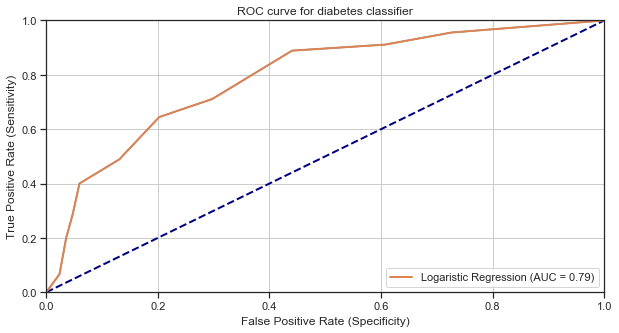

In [58]:
from sklearn.metrics import roc_curve, auc

# function roc_curve
# input: IMPORTANT: first argument is true values, second argument is predicted probabilities
#                   we do not use y_pred_class, because it will give incorrect results without 
#                   generating an error
# output: FPR, TPR, thresholds
# FPR: false positive rate
# TPR: true positive rate

FPR, TPR, thresholds = roc_curve(test_Y, save_predictions_proba)

plt.figure(figsize=(10,5))  # figsize in inches
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='Logaristic Regression (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")

In [59]:
# Define a function that accepts a threshold and prints sensitivity and specificity:

def evaluate_threshold(threshold):
    print("Sensitivity: %.4f" % (TPR[thresholds > threshold][-1]))
    print("Specificy  : %.4f" % (1 - FPR[thresholds > threshold][-1]))

print ('Threshold = 0.5')
evaluate_threshold(0.5)
print ()
print ('Threshold = 0.35')
evaluate_threshold(0.35)

Threshold = 0.5
Sensitivity: 0.4889
Specificy  : 0.8690

Threshold = 0.35
Sensitivity: 0.7111
Specificy  : 0.7024


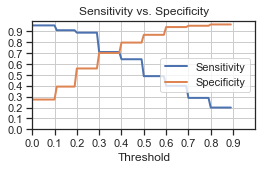

In [60]:
spec = []
sens = []
thres = []

threshold = 0.00
for x in range(0, 90):
    thres.append(threshold)
    sens.append(TPR[thresholds > threshold][-1])
    spec.append(1 - FPR[thresholds > threshold][-1])
    threshold += 0.01
    
plt.plot(thres, sens, lw=2, label='Sensitivity')
plt.plot(thres, spec, lw=2, label='Specificity')
ax = plt.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1, 0.1))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Sensitivity vs. Specificity')
plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc="center right")

By using Random forest and a threshold of 0.35, we found an algorithm with a sensitivity of about 0.73 and a specificity of 0.63.